In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chemparse as cp

#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.

# Função para normalizar todas as colunas de um dataframe pelo método de valor mínimo 0 e máximo 1
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado


In [98]:
#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")
df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)
df_chem = df.reindex(df.columns[[0, 1, 2, 3,4,5,6,135,136,137]], axis=1)
df_chem.shape
#print(df_chem)

# Normalização do DataFrame
df2 = normalizar(df_chem)
df_tratado = df2.dropna(axis = 1)
df_tratado

# Computação e análise descritiva e estatística dos dados

print(df_tratado.describe())

       Crystal Structure  Mohs Hardness  Diaphaneity  Specific Gravity  \
count        3112.000000    3112.000000  3112.000000       3112.000000   
mean            0.112843       0.089045     0.135069          0.069509   
std             0.231429       0.194133     0.292655          0.154456   
min             0.000000       0.000000     0.000000          0.000000   
25%             0.000000       0.000000     0.000000          0.000000   
50%             0.000000       0.000000     0.000000          0.000000   
75%             0.000000       0.000000     0.000000          0.000000   
max             1.000000       1.000000     1.000000          1.000000   

           Optical  Refractive Index   Dispersion   Molar Mass  Molar Volume  \
count  3112.000000       3112.000000  3112.000000  3112.000000   3112.000000   
mean      0.175289          0.095662     0.002154     0.042557      0.051138   
std       0.364192          0.200641     0.032163     0.047322      0.060388   
min       0.0

In [76]:
# Matriz de Covariância
df_tratado.cov()

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
Crystal Structure,0.053559,0.032788,0.049095,0.025826,0.058538,0.033881,0.001200,-0.001329,-0.001440,-0.001877
Mohs Hardness,0.032788,0.037688,0.039745,0.022543,0.054930,0.030824,0.001006,-0.000974,-0.000939,-0.002254
Diaphaneity,0.049095,0.039745,0.085647,0.032165,0.086624,0.047263,0.000740,-0.001256,-0.000802,-0.005215
Specific Gravity,0.025826,0.022543,0.032165,0.023857,0.043854,0.025093,0.000912,-0.000771,-0.000947,0.000577
Optical,0.058538,0.054930,0.086624,0.043854,0.132636,0.067539,0.001332,-0.001544,-0.000737,-0.007293
Refractive Index,0.033881,0.030824,0.047263,0.025093,0.067539,0.040257,0.001120,-0.000886,-0.000698,-0.002367
Dispersion,0.001200,0.001006,0.000740,0.000912,0.001332,0.001120,0.001034,-0.000058,-0.000085,0.000168
Molar Mass,-0.001329,-0.000974,-0.001256,-0.000771,-0.001544,-0.000886,-0.000058,0.002239,0.002140,0.002276
Molar Volume,-0.001440,-0.000939,-0.000802,-0.000947,-0.000737,-0.000698,-0.000085,0.002140,0.003647,-0.003010
Calculated Density,-0.001877,-0.002254,-0.005215,0.000577,-0.007293,-0.002367,0.000168,0.002276,-0.003010,0.042280


In [69]:
#relação de Pearson
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(corrmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=0, vmax=1, annot=True)

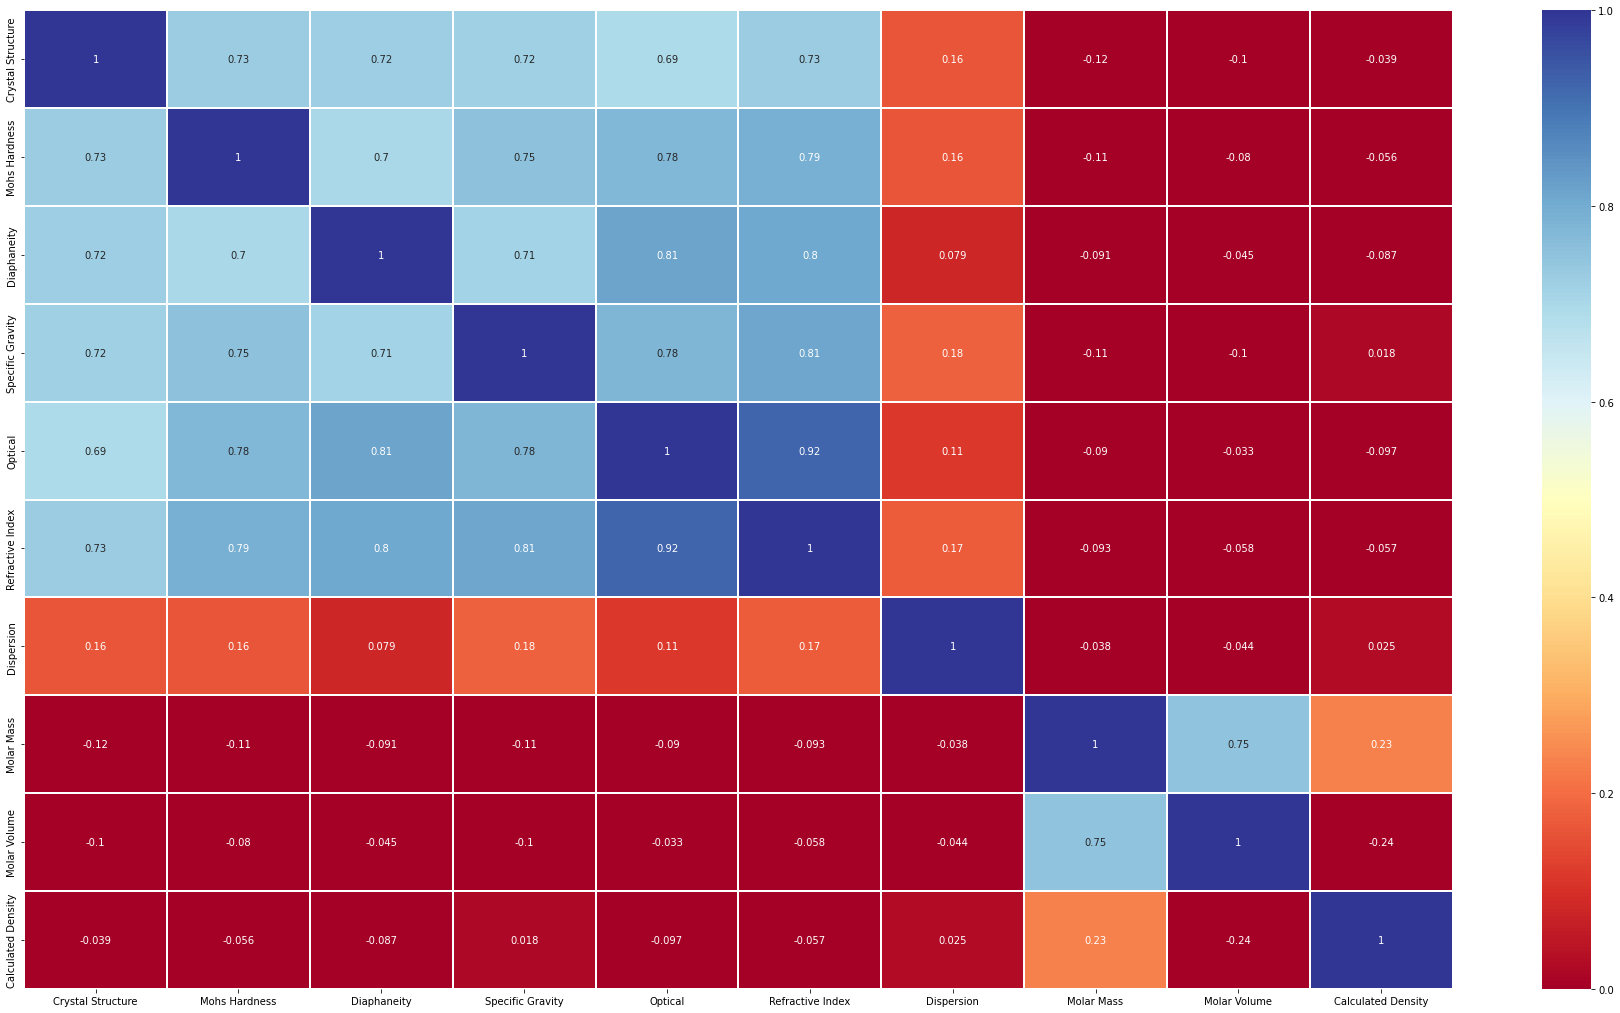

In [73]:
Pearson(df_tratado)

In [91]:
#correlação de Spearman
import numpy as np
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(spearmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=0, vmax=1, annot=True)


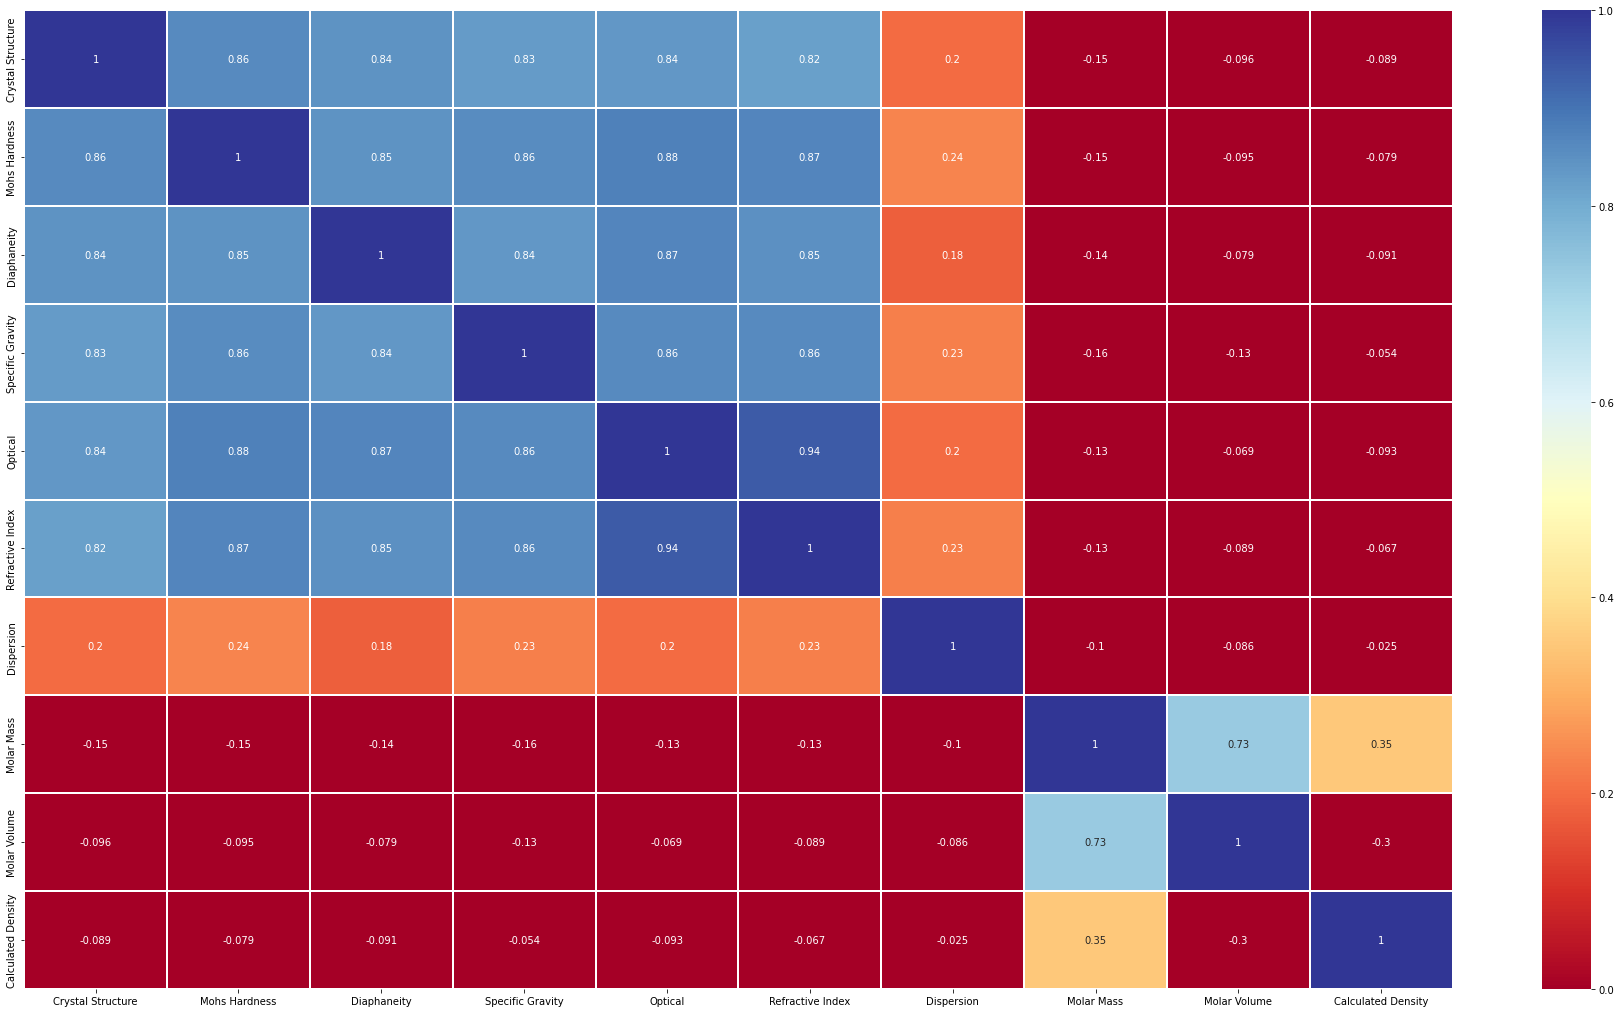

In [92]:
Spearman(df_chem,10,10)